<a href="https://colab.research.google.com/github/priyanshdatyal/TensorFlow-Notes-With-Code/blob/main/Topic_20_ImprovingAndExperimentingTheModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


X = tf.range(-100,100,4)
y=X+10

lengthTrain =len(X)*0.8
X_train = X[:int(lengthTrain)]
X_test = X[int(lengthTrain):]


y_train = y[:int(lengthTrain)]
y_test = y[int(lengthTrain):]

tf.random.set_seed(42)
model = tf.keras.Sequential([
                  tf.keras.layers.Dense(1,input_shape=[1]),
                  tf.keras.layers.Dense(1,input_shape=[1])
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.045),
    metrics=["mae"])

# model.summary()
model.fit(X_train,y_train,epochs=225,verbose=0)
y_predicted=model.predict(X_test)
y_predicted

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


array([[ 70.01865 ],
       [ 74.01486 ],
       [ 78.01107 ],
       [ 82.00728 ],
       [ 86.003494],
       [ 89.9997  ],
       [ 93.995926],
       [ 97.99213 ],
       [101.98835 ],
       [105.984566]], dtype=float32)

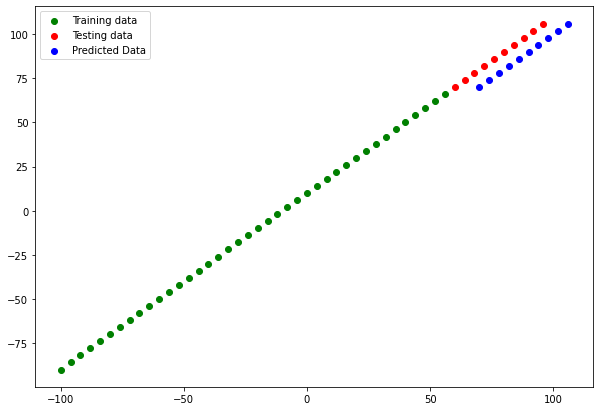

In [98]:
def plotGraph(
              xt=X_train,
              yt=y_train,
              ytst=y_test,
              xtst=X_test,
              predicted=y_predicted
              ):
  plt.figure(figsize=(10, 7))
  plt.scatter(xt, yt, c="g", label="Training data")
  plt.scatter(xtst, ytst, c="r", label="Testing data")
  plt.scatter(ytst, predicted, c="b", label="Predicted Data")
  plt.legend();
  
    
plotGraph()

In [99]:

mae = tf.metrics.mean_absolute_error(y_test,y_pred=tf.squeeze(tf.constant(y_predicted)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.009468079>

 #Steps

 Now we have improve our model and for that we have to 

 1. Get more dta or examples for our data to learn from
 2. Add more layers or make the model a little bit complex for it to have more opportunities to learn the patterns
 3. Train the model for longer
 

In [100]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

Now we will experiment with 3 models 

model1 = 1 l layer 100 epochs

model2 : 2 layer 100 epochs

model3 : 3 layer 100 epochs

In [101]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1,input_shape=[1])
])


model1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

Function for errors

In [122]:
def mae(y_test,y_pred):
  mae= tf.metrics.mean_absolute_error(y_test,tf.squeeze(tf.constant(y_pred)))
  return mae

def mse(y_testt,y_pred):
  mse= tf.metrics.mean_squared_error(y_test,tf.squeeze(tf.constant(y_pred)))
  return mse

Testing


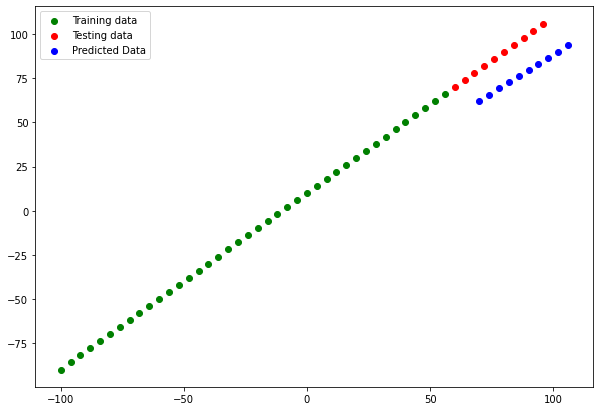

In [123]:
ypred1=model1.predict(y_test)
ypred1=tf.constant(ypred1)
plotGraph(predicted=ypred1)

In [125]:

ae = mae(y_test,ypred1)
se = mse(y_test,ypred1)

ae,se

(<tf.Tensor: shape=(), dtype=float32, numpy=10.032228>,
 <tf.Tensor: shape=(), dtype=float32, numpy=102.831665>)

# Model 2 Building

In [169]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
                              # tf.keras.layers.Input(shape=(1,)),
                              # tf.keras.layers.Normalization(input_shape=[1,], axis=None),
                              tf.keras.layers.Dense(10,input_shape=[1]),
                              tf.keras.layers.Dense(1)
])


model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model2.fit(X_train,y_train,epochs=100,verbose=0)

(<tf.Tensor: shape=(), dtype=float32, numpy=14.66625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=217.94864>)

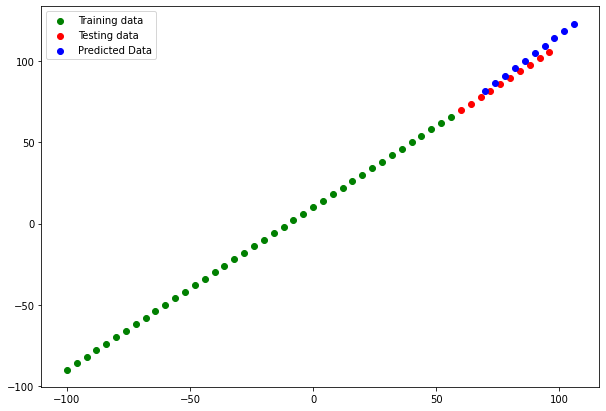

In [170]:
ypred2=model2.predict(y_test)
plotGraph(predicted=ypred2)
mae(y_test,ypred2),mse(y_test,ypred2)

#Model 3 Bulding

In [173]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
                              # tf.keras.layers.Input(shape=(1,)),
                              # tf.keras.layers.Normalization(input_shape=[1,], axis=None),
                              tf.keras.layers.Dense(10,input_shape=[1]),
                              tf.keras.layers.Dense(1)
])


model3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model3.fit(X_train,y_train,epochs=500,verbose=0)

(<tf.Tensor: shape=(), dtype=float32, numpy=66.80715>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4549.662>)

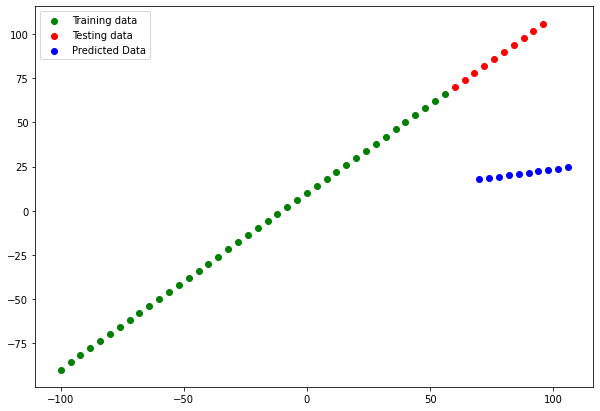

In [175]:

ypred3=model3.predict(y_test)
plotGraph(predicted=ypred3)
mae(y_test,ypred3),mse(y_test,ypred3)